머신러닝을 이용해 데이터의 패턴과 구조를 찾을 수 있으며 이를 통해 새로운 관측에 대한 결과 예측 가능

## 모듈 임포트하기

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 머신러닝에 대한 간략한 리뷰
훈련: 머신러닝에서 관측 데이터에 모델이나 알고리즘을 적합화하는 과정    
머신러닝 응용 분류
- 지도학습 : 특징 변수와 알려진 반응 변수를 갖고 있음
- 비지도 학습: 레이블이 부착되지 않았거나 원시 데이터를 사용해 훈련하는 경우

머신러닝 용어
- 교차 검증: 훈련데이터와 테스트 데이터로 나누는 관행으로 과적합 문제를 제한
- 특징 추출: 특징 변수와 해당 특징 행렬을 만드는 작업
- 차원 축소와 특징 선택: 모델 복잡도를 줄이기 위해서는 차원 축소하는 것이 바람직함

## 회귀
머신 러닝에서는 회귀 모델이 오직 새로운 관측을 얼마나 잘 예측하는지에만 관심이 있음

In [3]:
# 50개의 특징 중 10개 만이 회귀 모델의 예측력에 기여하는 경우 시뮬레이션
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [5]:
model = linear_model.LinearRegression() # 선형 회귀

In [6]:
# 데이터에 적합화
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# 제곱 오차의 합으로 계산
def sse(resid):
    return sum(resid**2)

In [8]:
# 모델 평가
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

5.567161802100208e-24

훈련데이터의 경우 과적합으로 인해 잔차는 거의 0으로 예측하는데 적절하지 못함   
-> 테스트 데이터셋의 SSE 계산해보기

In [9]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

365678.78654482315

SSE는 매우 큰 값으로  새로운 값을 예측하는데 적절하지 않음    
-> score 메서드를 사용해 R제곱 점수 계산하기

In [10]:
model.score(X_train, y_train)

1.0

In [11]:
model.score(X_test, y_test)

0.39592907680243716

훈련 데이터와 테스트 데이터셋 사이의 점수가 크다는 것은 과적합을 으미

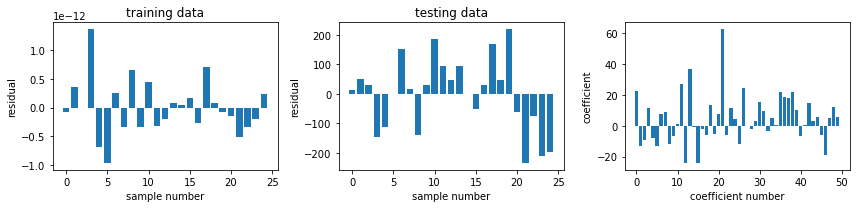

In [12]:
# 일반 선형 회귀 모델과 훈련 데이터의 잔차
# 모델과 테스트 데이터와의 잔차
# 50개 특징의 계수값

def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

위의 그림의 결과 모든 표본의 테스트와 훈련 데이터셋의 잔차 규모에는 큰 차이가 있음을 알 수 있음

과적합을 없앨 수 있는 방법 : 정규화 회귀
- 라소 회귀: L1 정규화
- 리지 회귀: L2 정규화

In [13]:
model = linear_model.Ridge(alpha=2.5) # alpha: 정규화 강도 결정
model.fit(X_train, y_train)
resid_train = y_train - model.predict(X_train) # 모델 예측
sse_train = sse(resid_train)
sse_train

2624.1285667024267

In [14]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

367103.52611979353

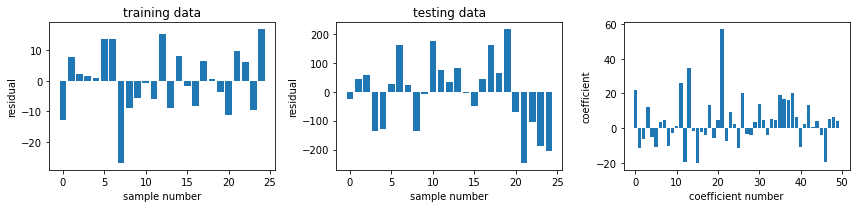

In [15]:
# 훈련 및 테스트 잔차와 모델 배개변수 도식화
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [16]:
# L1 정규화 라소 회귀 수행
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

917.5761636348266

In [17]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

131111.01968205528

회귀 모델이 훈련 데이터에 적합화되는 정도를 떨어뜨려 테스트 데이터셋을 예측하는 능력 크게 향상됨

위 예에서 사용한 알파값은 임의로 선택했지만 적합한 값을 찾아봐야함   
-> 넘파이 배열에 저장하여 반복적으로 풀어보기

In [18]:
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

# 알파값을 바꿔가며 라소 수행
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

C:\Users\lhg26\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.1714235705521, tolerance: 80.92032873256609
  model = cd_fast.enet_coordinate_descent(
C:\Users\lhg26\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.65956958460227, tolerance: 80.92032873256609
  model = cd_fast.enet_coordinate_descent(
C:\Users\lhg26\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.21875792705822, tolerance: 80.92032873256609
  model = cd_fast.enet_coordinate_descent(
C:\Users\lhg26\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

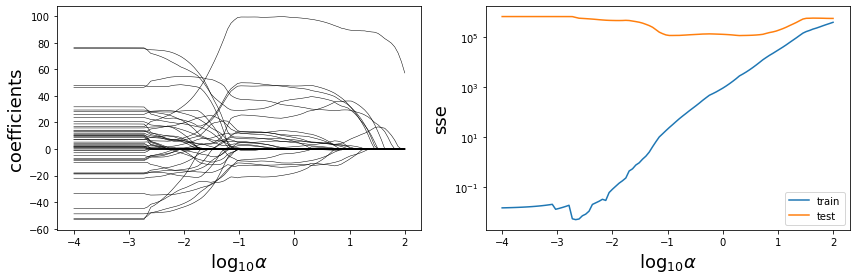

In [19]:
#알파 로그에 대한 함수로 라소를 수행한 계수
# 훈련 및 테스트 데이터셋의 제곱 오차 합

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()

왼쪽 그림에서 알파 값이 매우 작을 대 많은 수의 계수가 0이 아님을 확인 가능

오른쪽 그림에서 훈련 집합은 증가하지만 테스트 집합은 급격히 감소하는 것을 확인 가능    -> 라소 회귀에서 원하던 효과

In [20]:
# 알파에 대한 정규화 회귀 테스트 자동 수행
model = linear_model.LassoCV()
model.fit(X_all, y_all)

LassoCV()

In [21]:
# 교차 검증 탐색을 통해 선택된 정규화 강도 매개변수 값
model.alpha_

0.1144530846855781

In [22]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

3.331027519284134

In [23]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

4.627902558941757

교차 검증된 라소 기법을 통해 훈련, 테스트 데이터셋 모두에서 비교적 높은 정확도로 예측 가능

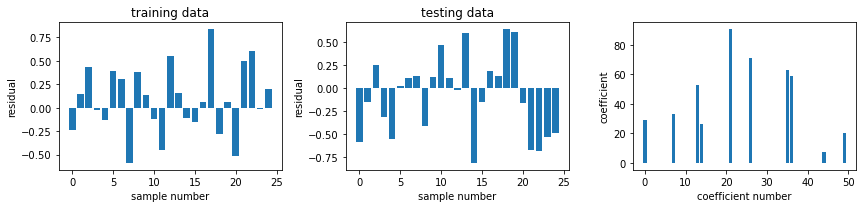

In [24]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

일래스틱 넷: L1, L2 정규화를 결합한 또 다른 형태의 정규화 회귀

In [25]:
model = linear_model.ElasticNetCV()
model.fit(X_all, y_all)
model.alpha_

0.22890616937115618

In [26]:
model.l1_ratio

0.5

In [27]:
# SSE 계산 
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

9125.090901481628

In [28]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

9680.687356016475

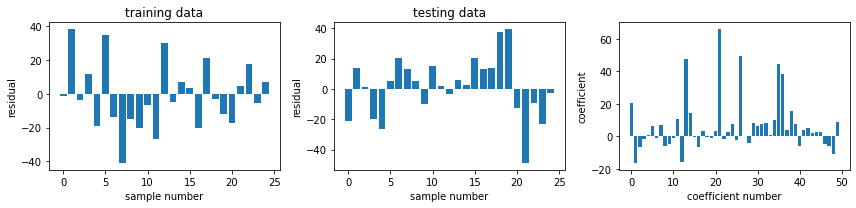

In [29]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

## 분류
최근접-이웃, 서포트 벡터 머신, 의사 결정 트리, 랜덤 포레스트 방식 등이 있음

In [30]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
# 실제 데이터셋
iris.data.shape

(150, 4)

In [34]:
iris.target.shape

(150,)

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

# 로지스틱 회귀 분류
classifier = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

# 실제 값과 예측 값 배열을 취한 후 거짓 부정과 거짓 긍정에 관련된 분류 척도 정보
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [36]:
# 혼동 행렬
# 대각은 잘 분류된 표본 개수
# 비대각 요소는 잘못 분류된 표본 개수
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 14]], dtype=int64)

위의 결과 2부류 1개 요소는 3부류로 잘못 분류 됨

In [37]:
# y_test의 고유한 값의 개수
np.bincount(y_test)

array([16, 15, 14], dtype=int64)

In [38]:
# 의사 결정 트리
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 14]], dtype=int64)

In [39]:
# 훈련 집합 크기를 10~90% 사이에서 변화
train_size_vec = np.linspace(0.1, 0.9, 30)

# 분류기 클래스 리스트 생성
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier]

# 혼돈 행렬의 대각을 저장할 배열 생성
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

# 분류기 훈련하면서 예측하고 혼돈 행렬 계산 후 대각을 cm_diags 배열의 이상적인 수치로 나눈 값을 저장
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

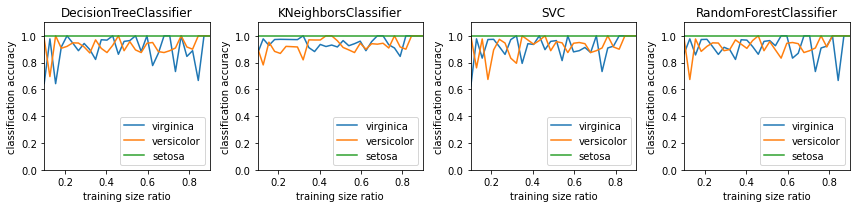

In [40]:
# 각 분류기에 대한 분류 정확도 도식화
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()

## 클러스터링
부류를 알 수 없는 데이터의 분류 문제로 비지도학습의 전형적인 예
- **K-평균 알고리즘**: 각 그룹 내에서 그룹 중심으로부터의 제곱 편차의 합계가 최소화되게 표본을 그룹화
- **평균-이동 알고리즘**: 데이터를 밀도 함수에 적합화시켜 표본을 클러스터링

In [41]:
X, y = iris.data, iris.target
n_clusters = 3
clustering = cluster.KMeans(n_clusters=n_clusters)
clustering.fit(X)

KMeans(n_clusters=3)

In [43]:
y_pred = clustering.predict(X)
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [44]:
# 표본 분류와 비교
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [45]:
# 각 요소 이름을 바꿔 동일한 그룹에 동일한 정수값 사용되도록 함
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [46]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

첫 번째 그룹은 정확하게 식별하지만 두, 세번째 그룹에서는 완전리 분리할 수 없음

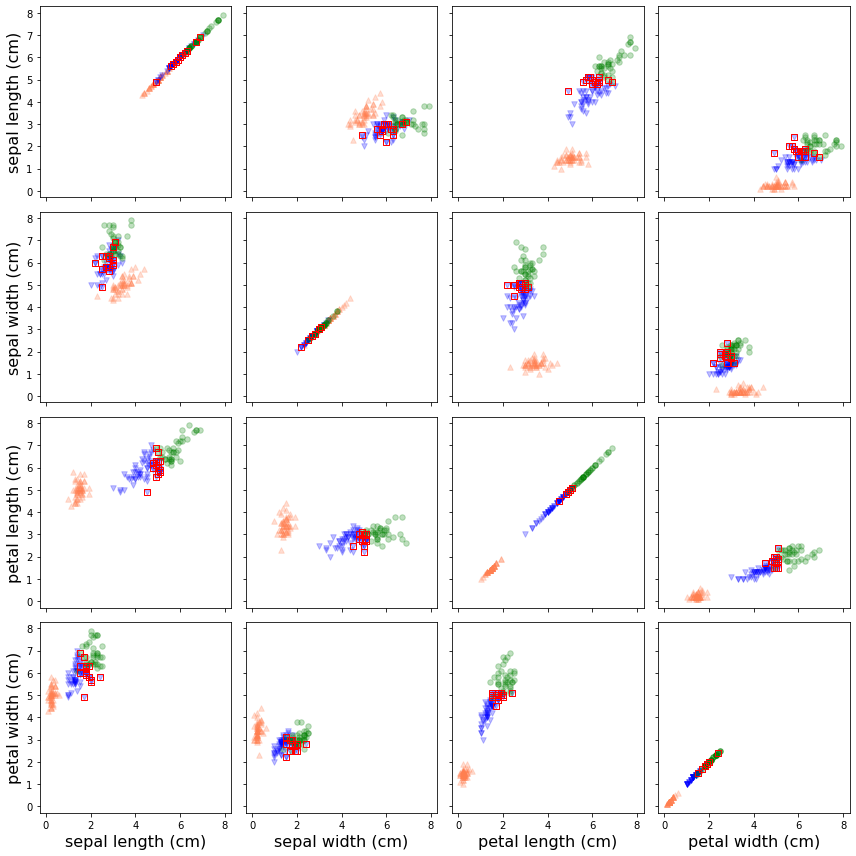

In [48]:
# iris 데이터셋 특징에 K-펴균 알고리즘을 사용한 클러시터링 결과
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()

클러스터링이 표본을 구분된 그룹으로 인식하는데 매우 뛰어난 역할을 한다는 것을 보여줌